In [22]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
%matplotlib
import matplotlib.pyplot as plt
plt.autoscale(enable=True)

Duplicate key in file '/Users/WDescamps/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


Using matplotlib backend: TkAgg


In [2]:
path = "/Users/WDescamps/Downloads/CDNOW_master/CDNOW_master.txt"

In [3]:
df = pd.read_csv(path, sep=' ',skipinitialspace=True, header=0, names=['user_id','order_date','nb_items','price'])

In [126]:
df.head(2) 

,user_id,order_date,nb_items,price,month,week,period
0,2,1997-01-12,1,12.0,1997-01-01,1997-01-09,-534.0
1,2,1997-01-12,5,77.0,1997-01-01,1997-01-09,-534.0


In [5]:
# Convert date field 
df['order_date']= pd.to_datetime(df['order_date'],format="%Y%m%d")

In [131]:
def infos():
    print("shape : \n",df.shape)
    print("info : \n",df.info())
    print("nulls? : \n",pd.isnull(df).any())  
    print("nbcustomers : \n",df.groupby(['user_id']).size().shape)
    print("Date ranges : \n", df['order_date'].min(), df['order_date'].max())

In [132]:
infos()

shape : 
 (69658, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69658 entries, 0 to 69657
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     69658 non-null  int64         
 1   order_date  69658 non-null  datetime64[ns]
 2   nb_items    69658 non-null  int64         
 3   price       69658 non-null  float64       
 4   month       69658 non-null  datetime64[ns]
 5   week        69658 non-null  datetime64[ns]
 6   period      69658 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(2)
memory usage: 3.7 MB
info : 
 None
nulls? : 
 user_id       False
order_date    False
nb_items      False
price         False
month         False
week          False
period        False
dtype: bool
nbcustomers : 
 (23569,)
Date ranges : 
 1997-01-01 00:00:00 1998-06-30 00:00:00


In [129]:
users_grouped = df.groupby('user_id').agg({'user_id':'count',
                                          'nb_items':'sum',
                                          'price':'sum'})
users_grouped.describe()

,user_id,nb_items,price
count,23569.000000,23569.000000,23569.000000
mean,2.955492,7.122916,106.084427
std,4.736642,16.983845,240.929523
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,19.970000
50%,1.000000,3.000000,43.410000
75%,3.000000,7.000000,106.490000
max,217.000000,1033.000000,13990.930000


# 1- Number of transactions /month and /week

In [133]:
# Number of daily transactions
ts_transactions = df.groupby(['order_date']).size()
ts_transactions.head(5)

order_date
1997-01-01    211
1997-01-02    247
1997-01-03    236
1997-01-04    178
1997-01-05    256
dtype: int64

In [11]:
# Month downsampling
df_dtindex = df.set_index(['order_date'])   # Set order_dt as index TimeStamp
month_grouped = df_dtindex.resample('m').sum()[['nb_items','price']]
month_grouped['sum_of_buyers_month'] = df_dtindex.resample('m')['user_id'].nunique()
month_grouped.head(2)

,nb_items,price,sum_of_buyers_month
order_date,,,
1997-01-31,19415,299048.40,7845
1997-02-28,24921,379590.03,9633


In [16]:
# Week downsampling
week_grouped = df_dtindex.resample('w').sum()[['nb_items','price']]
week_grouped['sum_of_buyers_weeks'] = df_dtindex.resample('w')['user_id'].nunique()
week_grouped.head(2)

,nb_items,price,sum_of_buyers_weeks
order_date,,,
1997-01-05,2512,39002.30,1101
1997-01-12,3930,61409.65,1718


In [13]:
week_grouped.plot()

<AxesSubplot:xlabel='order_date'>

In [17]:
# Visualisation through time
ts_transactions = df.groupby(['user_id']).size()
plt.ylabel('Transaction Count') 
ts_transactions.plot()

<AxesSubplot:xlabel='user_id', ylabel='Transaction Count'>

# 2- Analysis of consumption

In [23]:
user_grouped = df.groupby('user_id').agg({'user_id':'count',
                                          'nb_items':'sum',
                                          'price':'sum'})
user_grouped.describe()

,user_id,nb_items,price
count,23569.000000,23569.000000,23569.000000
mean,2.955492,7.122916,106.084427
std,4.736642,16.983845,240.929523
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,19.970000
50%,1.000000,3.000000,43.410000
75%,3.000000,7.000000,106.490000
max,217.000000,1033.000000,13990.930000


<AxesSubplot:ylabel='Frequency'>

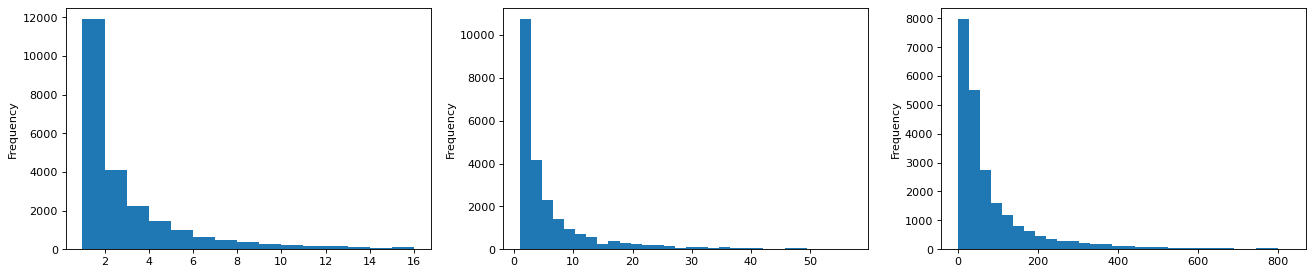

In [27]:
# Pourquoi ces bins?
plt.figure(figsize=(20,4),dpi=80)
plt.subplot(1,3,1)
user_grouped.query('user_id<17')['user_id'].plot.hist(bins=15)
plt.subplot(1,3,2)
user_grouped.query('nb_items<58')['nb_items'].plot.hist(bins=30)
plt.subplot(1,3,3)
user_grouped.query('price<829')['price'].plot.hist(bins=30)

most of the data are concentrated in low-value areas, reflecting the average consumption level of most users and the contribution value is not high

<AxesSubplot:xlabel='nb_items', ylabel='price'>

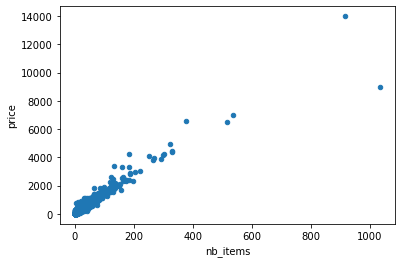

In [29]:
user_grouped.plot.scatter(x='nb_items',y='price')

mostly linear, so there is a consistency into the product and the buyer type, no big price changes

In [34]:
# 2.2 Downsample the data monthly
df_dtindex = df.set_index(['order_date'])   # Set order_dt as index TimeStamp
month_grouped = df_dtindex.resample('m').sum()[['nb_items','price']]
month_grouped['user_sum_month'] = df_dtindex.resample('m')['user_id'].nunique()
month_grouped.head(5)

,nb_items,price,user_sum_month
order_date,,,
1997-01-31,19415,299048.40,7845
1997-02-28,24921,379590.03,9633
1997-03-31,26159,393155.27,9524
1997-04-30,9729,142824.49,2822
1997-05-31,7275,107933.30,2214


array([<AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>], dtype=object)

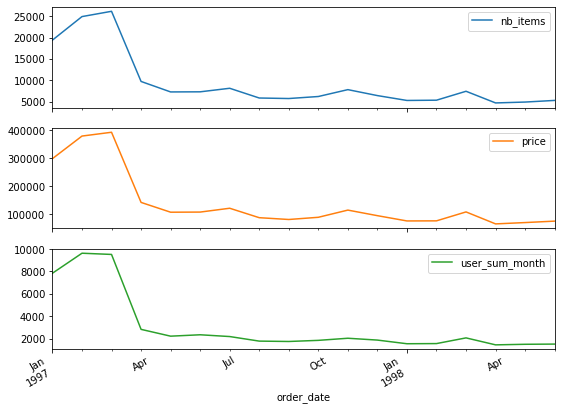

In [35]:
month_grouped.plot(kind='line',subplots=True,figsize=(9,7))

In [36]:
# 2.3 Downsample the data weekly
df_dtindex = df.set_index(['order_date'])   # Set order_dt as index TimeStamp
week_grouped = df_dtindex.resample('w').sum()[['nb_items','price']]
week_grouped['user_sum_month'] = df_dtindex.resample('w')['user_id'].nunique()
week_grouped.head(5)

,nb_items,price,user_sum_month
order_date,,,
1997-01-05,2512,39002.30,1101
1997-01-12,3930,61409.65,1718
1997-01-19,4149,63856.66,1880
1997-01-26,4930,75069.10,2128
1997-02-02,5555,84698.98,2386


array([<AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>], dtype=object)

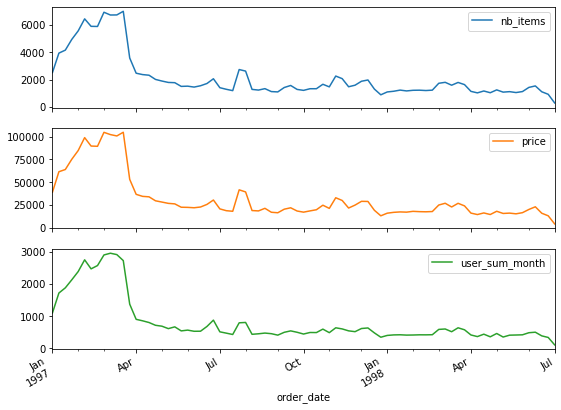

In [37]:
week_grouped.plot(kind='line',subplots=True,figsize=(9,7))

Big jump in early 1997. Low user retention. 

In [40]:
# User initial and final consumption
df["month"] = df["order_date"].values.astype("datetime64[M]")   # Convert year, month and day
df.head(2)

,user_id,order_date,nb_items,price,month
0,2,1997-01-12,1,12.0,1997-01-01
1,2,1997-01-12,5,77.0,1997-01-01


In [41]:
# User's initial consumption time analysis
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7845
1997-03-01    7248
Name: month, dtype: int64

In [42]:
# All buyers were gained in the first 3 months. Lets look at the weeks

In [46]:
df["week"] = df["order_date"].values.astype("datetime64[W]")   # Convert year, month and day
df.head(2)

,user_id,order_date,nb_items,price,month,week
0,2,1997-01-12,1,12.0,1997-01-01,1997-01-09
1,2,1997-01-12,5,77.0,1997-01-01,1997-01-09


In [47]:
# User's initial consumption time analysis
df.groupby('user_id').week.min().value_counts()

1997-02-27    2208
1997-02-06    2194
1997-03-06    2161
1997-01-30    2128
1997-02-20    2071
1997-01-23    2026
1997-02-13    2019
1997-03-13    1990
1997-01-16    1823
1997-01-09    1648
1997-01-02    1578
1997-03-20    1515
1996-12-26     208
Name: week, dtype: int64

All users were acquired in the first 3 months. When we look at weeks over those 3 months, user acquisition rate is pretty stable

In [53]:
# How many people only bought once?
user_grouped[user_grouped["user_id"]==1]['user_id'].count()/user_grouped["user_id"].count()

0.5051975051975052

In [58]:
# How many people only bought one item?
user_grouped[user_grouped["nb_items"]==1]['user_id'].count()/user_grouped["user_id"].count()

0.28885400313971743

# 3- Analysis of repurchase rate

In [61]:
# In this analysis, the month is used as the statistical window to make a pivot table
pivoted_counts = df.pivot_table(index='user_id',columns='month',values='order_date',aggfunc='count').fillna(0)
columns_month = df.month.astype('str').sort_values().unique()
pivoted_counts.columns = columns_month
pivoted_counts.head(2)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
# Users who have consumed twice or more in a monthly time window)
(pivoted_counts>1).head(5) 

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
# users with consumption in the monthly time window
(pivoted_counts>=1).head(5) 

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
5,True,True,False,True,True,True,True,False,True,False,False,True,True,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
# Calculate the proportion of users who have spent twice or more in the monthly time window in the total consumption users
month_counts_rate = pd.DataFrame((pivoted_counts>1).sum()/(pivoted_counts>=1).sum(),columns=['Repurchase rate'])
month_counts_rate.head(2)

,Repurchase rate
1997-01-01,0.107584
1997-02-01,0.122288


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

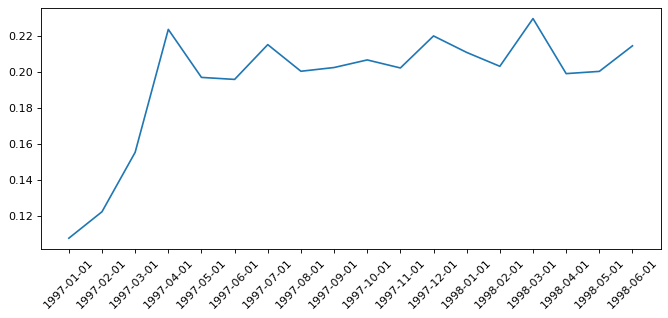

In [69]:
plt.figure(figsize=(10,4),dpi=80)
plt.plot(month_counts_rate)
plt.xticks(rotation=45)

Until April 1997, low repurchase rate, which is explained as we saw earlier that it corresponds to almost all new customers joining in that period. After that, repurchase rate stabilises, meaning old customers are pretty loyal but no new customers are gained.

We can infer that the value of those old customers is a key point

# 4 - RFM Segmentation

In [72]:
# The mean value of R\F\M is used as the boundary of the three dimensions
df['period'] = (df.order_date - df.order_date.max())/np.timedelta64(1,'D')
df.head()

,user_id,order_date,nb_items,price,month,week,period
0,2,1997-01-12,1,12.00,1997-01-01,1997-01-09,-534.0
1,2,1997-01-12,5,77.00,1997-01-01,1997-01-09,-534.0
2,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,-544.0
3,3,1997-03-30,2,20.76,1997-03-01,1997-03-27,-457.0
4,3,1997-04-02,2,19.54,1997-04-01,1997-03-27,-454.0


The more ancient the last consumption time was, the furthest the period is to zero.

In [75]:
# Use the function of the pivot table to find the recent consumption time, consumption frequency and total consumption amount of each user
user_rfm = df.pivot_table(values=['period','nb_items','price'],
                          index='user_id',aggfunc={'period': 'max','nb_items':'count','price':'sum'})
user_rfm = user_rfm.rename(columns={'period':'R','nb_items':'F','price':'M'})
user_rfm.head()

,F,R,M
user_id,,,
2,2,-534.0,89.00
3,6,-33.0,156.46
4,4,-200.0,100.50
5,11,-178.0,385.61
6,1,-545.0,20.99


In [76]:
def level_div(data):
    level = data.apply(lambda x: '1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']
    div = {
        '111' : 'Important Value User',
        '101' : 'Important Development User',
        '011' : 'Important to keep users',
        '001' : 'Important retention of users',
        '110' : 'General value users',
        '100' : 'General development users',
        '010' : 'Generally keep users',
        '000' : 'General retention of users',
    }
    result = div[label]
    return result

user_rfm['label'] = (user_rfm - user_rfm.mean()).apply(level_div, axis=1)
user_rfm.head()

,F,R,M,label
user_id,,,,
2,2,-534.0,89.00,General retention of users
3,6,-33.0,156.46,Important Value User
4,4,-200.0,100.50,General value users
5,11,-178.0,385.61,Important Value User
6,1,-545.0,20.99,General retention of users


In [77]:
user_rfm.label.value_counts()

General retention of users      13607
Important Value User             4617
General value users              1974
General development users        1532
Important retention of users      579
Generally keep users              543
Important to keep users           449
Important Development User        268
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x12b51bbe0>,
 [Text(-0.2645995598835945, 1.067701771521153, 'General retention of users'),
  Text(-0.4977098714515812, -0.9809612040542942, 'Important Value User'),
  Text(0.4374723979809822, -1.009266020930443, 'General value users'),
  Text(0.8452403977201083, -0.7039663841846098, 'General development users'),
  Text(1.0074793675861549, -0.4415714255793749, 'Important retention of users'),
  Text(1.0620267322369876, -0.28652961454974585, 'Generally keep users'),
  Text(1.0905326806035038, -0.1440085849376227, 'Important to keep users'),
  Text(1.0992982253345562, -0.03928627974618538, 'Important Development User')],
 [Text(-0.1443270326637788, 0.5823827844660834, '57.7%'),
  Text(-0.27147811170086245, -0.5350697476659786, '19.6%'),
  Text(0.23862130798962664, -0.5505087386893325, '8.4%'),
  Text(0.4610402169382408, -0.3839816641006962, '6.5%'),
  Text(0.549534200501539, -0.24085714122511356, '2.5%'),
  Text(0.5792873084929022, -0.15628888066349772, '2.

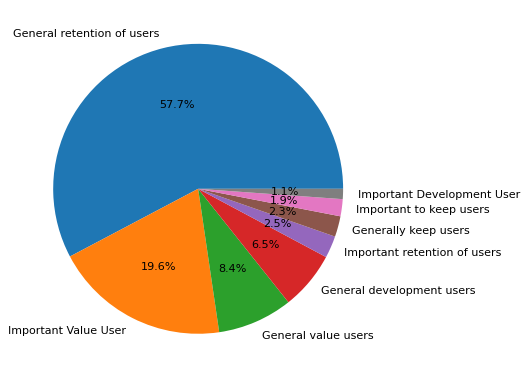

In [78]:
plt.figure(figsize=(6,6),dpi=80)
plt.pie(user_rfm.label.value_counts(),labels=user_rfm.label.value_counts().index,autopct='%3.1f%%')

In [86]:
# Stratification of users 
def user_status(data):
    status = []
    if data[0] == 0:
        status.append('unreg')
    else:
        status.append('new')
    for i in range(data.count()-1):
        if data[i+1] == 0:
            if status[i] == 'unreg':
                status.append('unreg')
            else :
                status.append('inactive')
        else:
            if status[i] == 'unreg':
                status.append('new')
            elif status[i] == 'unactive':
                status.append('returning')
            else:
                status.append('active')
    return pd.Series(status,index=data.index)
pivoted_user_status = pivoted_counts.apply(user_status, axis=1)
pivoted_user_status.head()


,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
2,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
3,new,inactive,active,active,inactive,inactive,inactive,inactive,inactive,inactive,active,inactive,inactive,inactive,inactive,inactive,active,inactive
4,new,inactive,inactive,inactive,inactive,inactive,inactive,active,inactive,inactive,inactive,active,inactive,inactive,inactive,inactive,inactive,inactive
5,new,active,inactive,active,active,active,active,inactive,active,inactive,inactive,active,active,inactive,inactive,inactive,inactive,inactive
6,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive


In [87]:
user_status_counts = pivoted_user_status.replace('unreg',np.NaN).apply(pd.value_counts)  #value_counts is a function in the Series
user_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157,2276,2822.0,2214.0,2339.0,2180.0,1772.0,1739.0,1839.0,2028.0,1864.0,1537.0,1551.0,2060.0,1437.0,1488.0,1506.0
inactive,NaN,6688,14045,20747.0,21355.0,21230.0,21389.0,21797.0,21830.0,21730.0,21541.0,21705.0,22032.0,22018.0,21509.0,22132.0,22081.0,22063.0
new,7845.0,8476,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


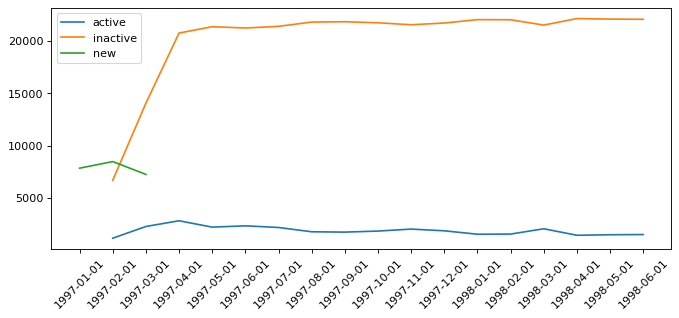

In [88]:
# Draw curves of different types of users over time
plt.figure(figsize=(10,4),dpi=80)
plt.plot(user_status_counts.T)
plt.xticks(rotation=45)
plt.legend(user_status_counts.index)

These curves underlign the previous points about user acquisition in the first three months, and mostly inactive after that. While a loyal customer base is always steadily active even though slightly on the decline.

In [96]:
df

,user_id,order_date,nb_items,price,month,week,period
0,2,1997-01-12,1,12.00,1997-01-01,1997-01-09,-534.0
1,2,1997-01-12,5,77.00,1997-01-01,1997-01-09,-534.0
2,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,-544.0
3,3,1997-03-30,2,20.76,1997-03-01,1997-03-27,-457.0
4,3,1997-04-02,2,19.54,1997-04-01,1997-03-27,-454.0
...,...,...,...,...,...,...,...
69653,23568,1997-04-05,4,83.74,1997-04-01,1997-04-03,-451.0
69654,23568,1997-04-22,1,14.99,1997-04-01,1997-04-17,-434.0
69655,23569,1997-03-25,2,25.74,1997-03-01,1997-03-20,-462.0
69656,23570,1997-03-25,3,51.12,1997-03-01,1997-03-20,-462.0


In [101]:
#user_amount = df.groupby('user_id')['price','nb_items'].sum().reset_index()
#user_amount.head(2)

<ipython-input-101-a8d9fbc774a2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_amount = df.groupby('user_id')['price','nb_items'].sum().reset_index()


,user_id,price,nb_items
0,2,89.00,6
1,3,156.46,16


In [104]:
# User quality analysis through their consumption amount

user_amount = df.groupby('user_id')['price','nb_items'].sum().reset_index()
user_amount_sum = user_amount['nb_items'].sum()
user_amount['amount_cumsum'],user_amount['prop_cumsum'] = user_amount['price'].cumsum(),(user_amount['price']/user_amount_sum).cumsum()
user_amount.tail()

<ipython-input-104-d4e10aa79c22>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_amount = df.groupby('user_id')['price','nb_items'].sum().reset_index()


,user_id,price,nb_items,amount_cumsum,prop_cumsum
23564,23566,36.00,2,2500041.37,14.891836
23565,23567,20.97,1,2500062.34,14.891961
23566,23568,121.70,6,2500184.04,14.892685
23567,23569,25.74,2,2500209.78,14.892839
23568,23570,94.08,5,2500303.86,14.893399


# 5 - User life cycle analysis (LTV)

In [108]:
user_amount1 = df.groupby('user_id')['price'].sum()
user_LTV = pd.DataFrame(user_amount1.values,columns=['LTV'],index=user_amount1.index)
user_LTV['lifetime'] = (df.groupby('user_id')['order_date'].max()-df.groupby('user_id')['order_date'].min())/np.timedelta64(1,'D')
user_LTV.head()

,LTV,lifetime
user_id,,
2,89.00,0.0
3,156.46,511.0
4,100.50,345.0
5,385.61,367.0
6,20.99,0.0


In [109]:
user_LTV[user_LTV.lifetime>0].lifetime.describe()

count    11516.000000
mean       276.044807
std        166.633990
min          1.000000
25%        117.000000
50%        302.000000
75%        429.000000
max        544.000000
Name: lifetime, dtype: float64

<AxesSubplot:>

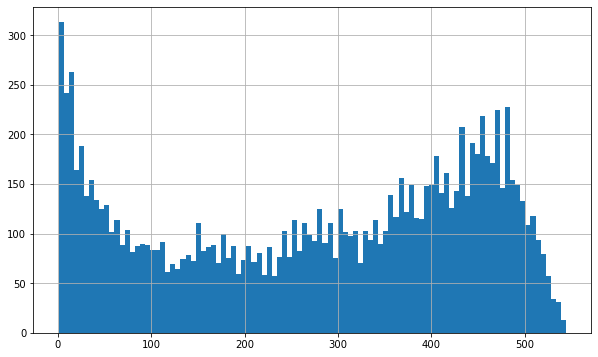

In [110]:
user_LTV[user_LTV.lifetime>0].lifetime.hist(bins=100,figsize=(10,6))

The average life cycle of users who spend more than twice is 276 days. bimodal trend. Users should be guided within 30 days of user consumption to promote consumption again and form consumption habits to extend their life cycle. Users with a user life cycle of 100-400 days need to launch targeted marketing activities based on their characteristics to guide their continuous consumption.
Users with a life cycle greater than 400 days are considered loyal users of the website and should focus on maintenance and develop a personalized operation strategy.

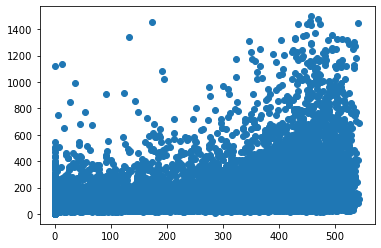

In [111]:
# Filter out one shot users and extreme LTV users
user_LTV_query = user_LTV.query('lifetime>0' and 'LTV<1500')
# Draw a scatter plot of user life cycle and total value of user life cycle (user total consumption)
plt.scatter(x=user_LTV_query.lifetime,y=user_LTV_query.LTV)

In [112]:
# User retention analysis
user_retention = pd.merge(left=df, right=df.groupby('user_id')['order_date'].min().reset_index(),
                          how='inner', on='user_id', suffixes=('', '_min'))
user_retention.head()

,user_id,order_date,nb_items,price,month,week,period,order_date_min
0,2,1997-01-12,1,12.00,1997-01-01,1997-01-09,-534.0,1997-01-12
1,2,1997-01-12,5,77.00,1997-01-01,1997-01-09,-534.0,1997-01-12
2,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,-544.0,1997-01-02
3,3,1997-03-30,2,20.76,1997-03-01,1997-03-27,-457.0,1997-01-02
4,3,1997-04-02,2,19.54,1997-04-01,1997-03-27,-454.0,1997-01-02


In [115]:
# Calculate the time interval between the user's consumption and the first consumption, and convert it into a numeric value
user_retention['date_diff'] = (user_retention.order_date-user_retention.order_date_min)/np.timedelta64(1,'D')
# Bind the user consumption time interval
bins = [0,3,7,15,30,60,90,180,365]
user_retention['date_diff_bin'] = pd.cut(user_retention.date_diff,bins=bins)
user_retention.head()

,user_id,order_date,nb_items,price,month,week,period,order_date_min,date_diff,date_diff_bin
0,2,1997-01-12,1,12.00,1997-01-01,1997-01-09,-534.0,1997-01-12,0.0,NaN
1,2,1997-01-12,5,77.00,1997-01-01,1997-01-09,-534.0,1997-01-12,0.0,NaN
2,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,-544.0,1997-01-02,0.0,NaN
3,3,1997-03-30,2,20.76,1997-03-01,1997-03-27,-457.0,1997-01-02,87.0,"(60.0, 90.0]"
4,3,1997-04-02,2,19.54,1997-04-01,1997-03-27,-454.0,1997-01-02,90.0,"(60.0, 90.0]"


In [117]:
# Make a pivot table
pivoted_retention = user_retention.pivot_table(index='user_id',columns='date_diff_bin',values='price',aggfunc=sum,dropna=False)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Count the average consumption of users in subsequent time periods after the first consumption
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

The average consumption amount of users in the latest time bin is higher, but the time range is wider. Relatively, user consumption is relatively higher within 0-3 days after the first consumption.

In [119]:
# Calculate the proportion of consuming users in each time period, that is, what proportion of the users who consumed for the first time consumes again in each time period
retention = pivoted_retention.count()/23570
retention

date_diff_bin
(0, 3]        0.026856
(3, 7]        0.035129
(7, 15]       0.060798
(15, 30]      0.090539
(30, 60]      0.129699
(60, 90]      0.099703
(90, 180]     0.197030
(180, 365]    0.260246
dtype: float64

<AxesSubplot:xlabel='date_diff_bin'>

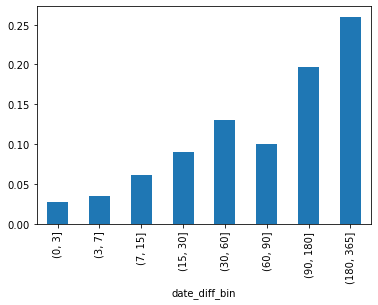

In [120]:
retention.plot.bar()

2.7% of users have made purchases within 3 days after the first purchase, and 3.5% of users have made purchases within 3-7 days.
About 20% of users have made purchases within three months to six months after the first purchase, and 26% of users have made purchases within six months to one year. 

In [123]:
# 6- What to do with all of this? 

# Define a function to calculate the time interval of user consumption
def diff(group):
    d = group.date_diff - group.date_diff.shift(1)
    return d
last_diff = user_retention.groupby('user_id').apply(diff)
last_diff.head(10)

user_id   
2        0      NaN
         1      0.0
3        2      NaN
         3     87.0
         4      3.0
         5    227.0
         6     10.0
         7    184.0
4        8      NaN
         9     17.0
Name: date_diff, dtype: float64

The df.shift() function is used to calculate the percentage change: df/df.shift(1)-1

In [124]:
last_diff.describe()

count    46089.000000
mean        68.973768
std         91.033032
min          0.000000
25%         10.000000
50%         31.000000
75%         89.000000
max        533.000000
Name: date_diff, dtype: float64

the mean consumption time interval of users is 69 days. Therefore, if you want to recall users, a consumption interval of about 60 days is a better operation strategy

<AxesSubplot:>

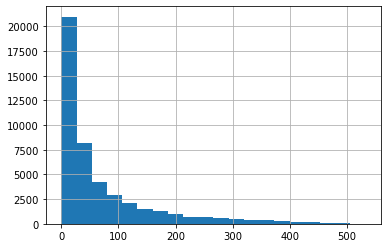

In [125]:
last_diff.hist(bins=20)

long-tailed distribution, and the consumption interval of most users is indeed relatively short? Users should be activated soon after their first purchase, ideally using the 69 day of mean consumption time users could be activated a bit sooned, ie +/ 30 days and then a second time at 60 days through a fidelisation strategy

In [ ]:
https://www.programmersought.com/article/81005144684/

In [ ]:
https://colab.research.google.com/drive/1yxUkWZSBJWIoxBAi7MIxvkWKNgr0NXDH#scrollTo=jvzYNo4NBtvr